In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 120.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.corr()['Outcome']    # to see that how other column is related to the output column

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


In [ ]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout

In [ ]:
X_train.shape

(614, 8)

In [ ]:
model = Sequential()

model.add(Dense(32,activation='relu',input_dim=8))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5676 - loss: 0.7744 - val_accuracy: 0.6299 - val_loss: 0.7641
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6532 - loss: 0.7007 - val_accuracy: 0.6364 - val_loss: 0.6980
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6856 - loss: 0.6369 - val_accuracy: 0.6818 - val_loss: 0.6434
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6922 - loss: 0.5949 - val_accuracy: 0.7143 - val_loss: 0.6053
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7257 - loss: 0.5752 - val_accuracy: 0.7597 - val_loss: 0.5796
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7146 - loss: 0.5651 - val_accuracy: 0.7662 - val_loss: 0.5577
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7377 - loss: 0.5330 - val_accuracy: 0.7792 - val_loss: 0.5430
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7696 - loss: 0.5030 - val_accuracy: 0.7922 - 

In [ ]:
# 1. how to select appropriate optimizer
# 2. No. of nodes in a layer
# 3. how to select no. of
# 4. All in one model

In [ ]:
pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.6 MB/s eta 0:00:00


In [ ]:
import kerastuner as kt

<ipython-input-28-5fd8096cdee5>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
def build_model(hp):

  model = Sequential()

  model.add(Dense(32,activation='relu',input_dim=8))
  model.add(Dense(1,activation='sigmoid'))
  optimizer = hp.Choice('optimizer',values = ['adam','sgd','rmsprop','adadelta'])

  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
#  or we can write this : model.compile(optimizer=hp.Choice('optimizer',['adam','sgd','rmsprop','adadelta']))

  return model

In [ ]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 4 Complete [00h 00m 02s]
val_accuracy: 0.7207792401313782

Best val_accuracy So Far: 0.798701286315918
Total elapsed time: 00h 00m 08s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7930 - loss: 0.4167 - val_accuracy: 0.8182 - val_loss: 0.4769
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8135 - loss: 0.4373 - val_accuracy: 0.8182 - val_loss: 0.4759
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8237 - loss: 0.3984 - val_accuracy: 0.8052 - val_loss: 0.4752
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8069 - loss: 0.4249 - val_accuracy: 0.8117 - val_loss: 0.4754
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8135 - loss: 0.4250 - val_accuracy: 0.8117 - val_loss: 0.4754
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8057 - loss: 0.4216 - val_accuracy: 0.8117 - val_loss: 0.4764
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8028 - loss: 0.4003 - val_accuracy: 0.7987 - val_loss: 0.4749
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8256 - loss: 0.3812 - val_accuracy: 0.8182 - v

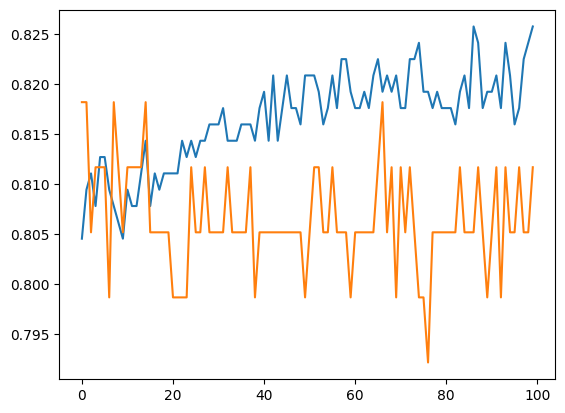

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
def build_model(hp):

    model = Sequential()

    units = hp.Int('units',min_value = 8,max_value = 128,step=8)

    model.add(Dense(units=units,activation='relu',input_dim=8))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

    return model

In [ ]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='mydir',project_name='Bhavesh_tunning')

In [ ]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.4610389471054077

Best val_accuracy So Far: 0.7857142686843872
Total elapsed time: 00h 00m 12s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'units': 112}

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

In [ ]:
history = model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8188 - loss: 0.3795 - val_accuracy: 0.8182 - val_loss: 0.4648
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8361 - loss: 0.3759 - val_accuracy: 0.8117 - val_loss: 0.4618
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8382 - loss: 0.3776 - val_accuracy: 0.8182 - val_loss: 0.4641
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8644 - loss: 0.3378 - val_accuracy: 0.8182 - val_loss: 0.4640
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8309 - loss: 0.3892 - val_accuracy: 0.8117 - val_loss: 0.4684
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8547 - loss: 0.3612 - val_accuracy: 0.8182 - val_loss: 0.4643
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8366 - loss: 0.3799 - val_accuracy: 0.8117 - val_loss: 0.4665
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8257 - loss: 0.3822 - val_accuracy: 0.8117 - v

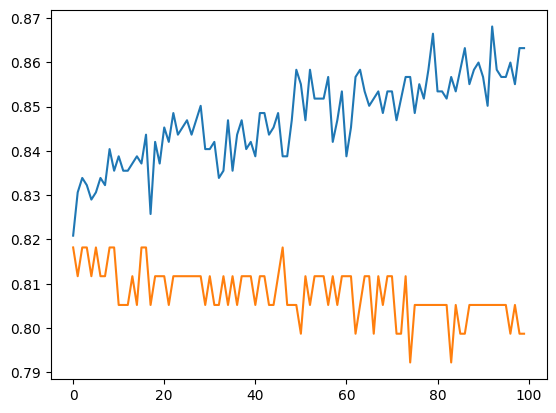

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
def build_model(hp):

  model = Sequential()

  model.add(Dense(112,activation='relu',input_dim=8))

  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):

    model.add(Dense(72,activation='relu'))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

  return model

In [ ]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=3,directory='mydir',project_name='num_tuner')

Reloading Tuner from mydir/num_tuner/tuner0.json


In [ ]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 3 Complete [00h 00m 03s]
val_accuracy: 0.798701286315918

Best val_accuracy So Far: 0.798701286315918
Total elapsed time: 00h 01m 23s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 5}

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

In [ ]:
model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7971 - loss: 0.4467 - val_accuracy: 0.7468 - val_loss: 0.5089
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7904 - loss: 0.4294 - val_accuracy: 0.7792 - val_loss: 0.4998
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7855 - loss: 0.4378 - val_accuracy: 0.7662 - val_loss: 0.5240
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8142 - loss: 0.4203 - val_accuracy: 0.7792 - val_loss: 0.5193
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7898 - loss: 0.4184 - val_accuracy: 0.7727 - val_loss: 0.5148
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8200 - loss: 0.4033 - val_accuracy: 0.7662 - val_loss: 0.5196
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8294 - loss: 0.4047 - val_accuracy: 0.7857 - val_loss: 0.4972
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8400 - loss: 0.3743 - val_accuracy: 0.7662 - 

In [ ]:
def build_model(hp):

  model = Sequential()
  counter = 0

  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):

    if counter == 0:

      model.add(
          Dense(
              hp.Int('units' + str(i),min_value=8,max_value=128,step=8),
              activation=hp.Choice('activation' + str(i),values=['relu','tanh','sigmoid']),
              input_dim=8
              )
          )
      model.add(Dropout(hp.Choice('dropout' + str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    else:
        model.add(
          Dense(
              hp.Int('units' + str(i),min_value=8,max_value=128,step=8),
              activation=hp.Choice('activation' + str(i),values=['relu','tanh','sigmoid']),

              )
          )
        model.add(Dropout(hp.Choice('dropout' + str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    counter+=1

  model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer=hp.Choice('optimizer',values=['rmsprop','adam','sgd','nadam','adadelta']),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

In [ ]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=3,
                        directory = 'mydir',
                        project_name = 'final_tuner2')

In [ ]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 3 Complete [00h 00m 06s]
val_accuracy: 0.6428571343421936

Best val_accuracy So Far: 0.6428571343421936
Total elapsed time: 00h 00m 14s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'units0': 96,
 'activation0': 'sigmoid',
 'dropout0': 0.5,
 'optimizer': 'adadelta',
 'units1': 128,
 'activation1': 'relu',
 'dropout1': 0.7,
 'units2': 16,
 'activation2': 'relu',
 'dropout2': 0.8,
 'units3': 56,
 'activation3': 'tanh',
 'dropout3': 0.7,
 'units4': 80,
 'activation4': 'sigmoid',
 'dropout4': 0.3,
 'units5': 104,
 'activation5': 'tanh',
 'dropout5': 0.8,
 'units6': 40,
 'activation6': 'tanh',
 'dropout6': 0.2,
 'units7': 80,
 'activation7': 'sigmoid',
 'dropout7': 0.1}

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

In [ ]:
history = model.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test))

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5721 - loss: 0.9057 - val_accuracy: 0.6429 - val_loss: 0.6782
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5391 - loss: 0.9395 - val_accuracy: 0.6429 - val_loss: 0.6782
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5259 - loss: 0.8785 - val_accuracy: 0.6429 - val_loss: 0.6782
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5511 - loss: 0.9251 - val_accuracy: 0.6429 - val_loss: 0.6781
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5873 - loss: 0.8422 - val_accuracy: 0.6429 - val_loss: 0.6781
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5833 - loss: 0.8233 - val_accuracy: 0.6429 - val_loss: 0.6781
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5664 - loss: 0.8802 - val_accuracy: 0.6429 - val_loss: 0.6781
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5678 - loss: 0.9595 - val_accuracy: 0.6429 - v

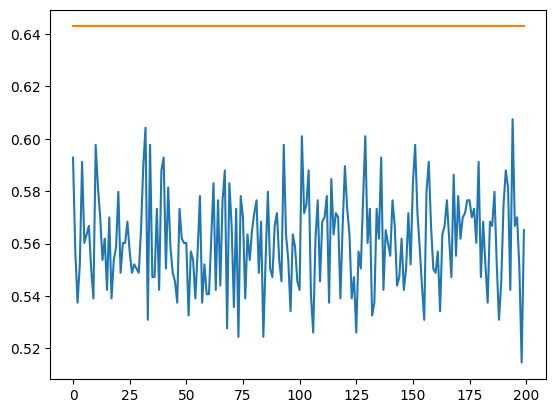

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])